Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3463 - val_loss: 0.1639
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1538 - val_loss: 0.1274
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.1235 - val_loss: 0.1085
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.1066 - val_loss: 0.0976
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0969 - val_loss: 0.0903
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0900 - val_loss: 0.0854
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.0852 - val_loss: 0.0818
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0820 - val_loss: 0.0793
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0798 - val_loss: 0.0777
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0780 - val_loss: 0.0765
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0770 - val_loss: 0.0757
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/

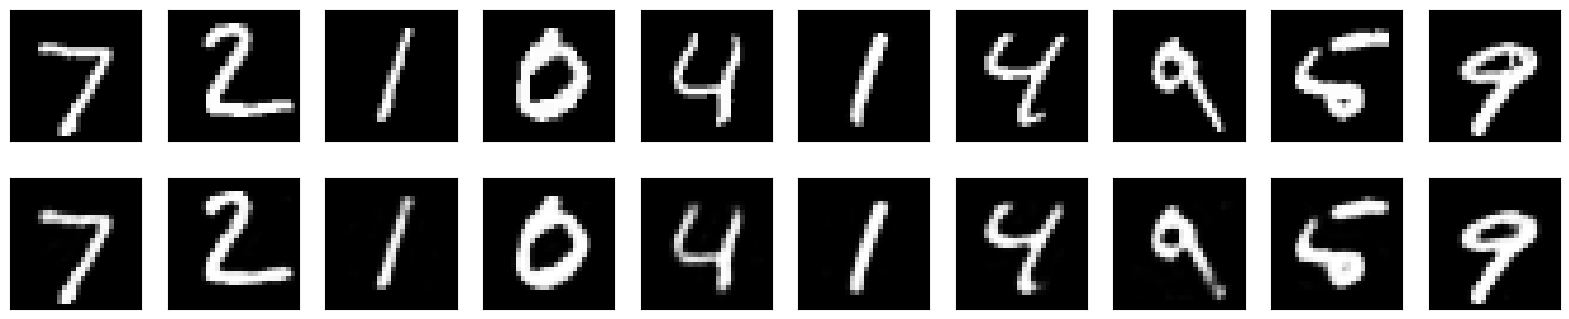

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images for input to the autoencoder
x_train_flattened = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flattened = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the size of the encoded (compressed) representation
encoding_dim = 64  # This can be changed depending on how much you want to compress the image

# Autoencoder architecture
input_img = Input(shape=(784,))  # 28x28 images flattened into vectors of size 784

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_flattened, x_train_flattened,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flattened, x_test_flattened))

# Define a separate encoder model
encoder = Model(input_img, encoded)

# Encode and decode some images
encoded_imgs = encoder.predict(x_test_flattened)
decoded_imgs = autoencoder.predict(x_test_flattened)

# Reshape the decoded images back to 28x28 for visualization
decoded_imgs = decoded_imgs.reshape((len(decoded_imgs), 28, 28))

# Plot original and reconstructed images for comparison
n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstructed images
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3494 - val_loss: 0.1597
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1502 - val_loss: 0.1254
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1218 - val_loss: 0.1081
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.1066 - val_loss: 0.0978
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0968 - val_loss: 0.0902
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0897 - val_loss: 0.0851
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0850 - val_loss: 0.0815
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0816 - val_loss: 0.0790
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0795 - val_loss: 0.0774
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0777 - val_loss: 0.0763
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 0.0768 - val_loss: 0.0754
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step

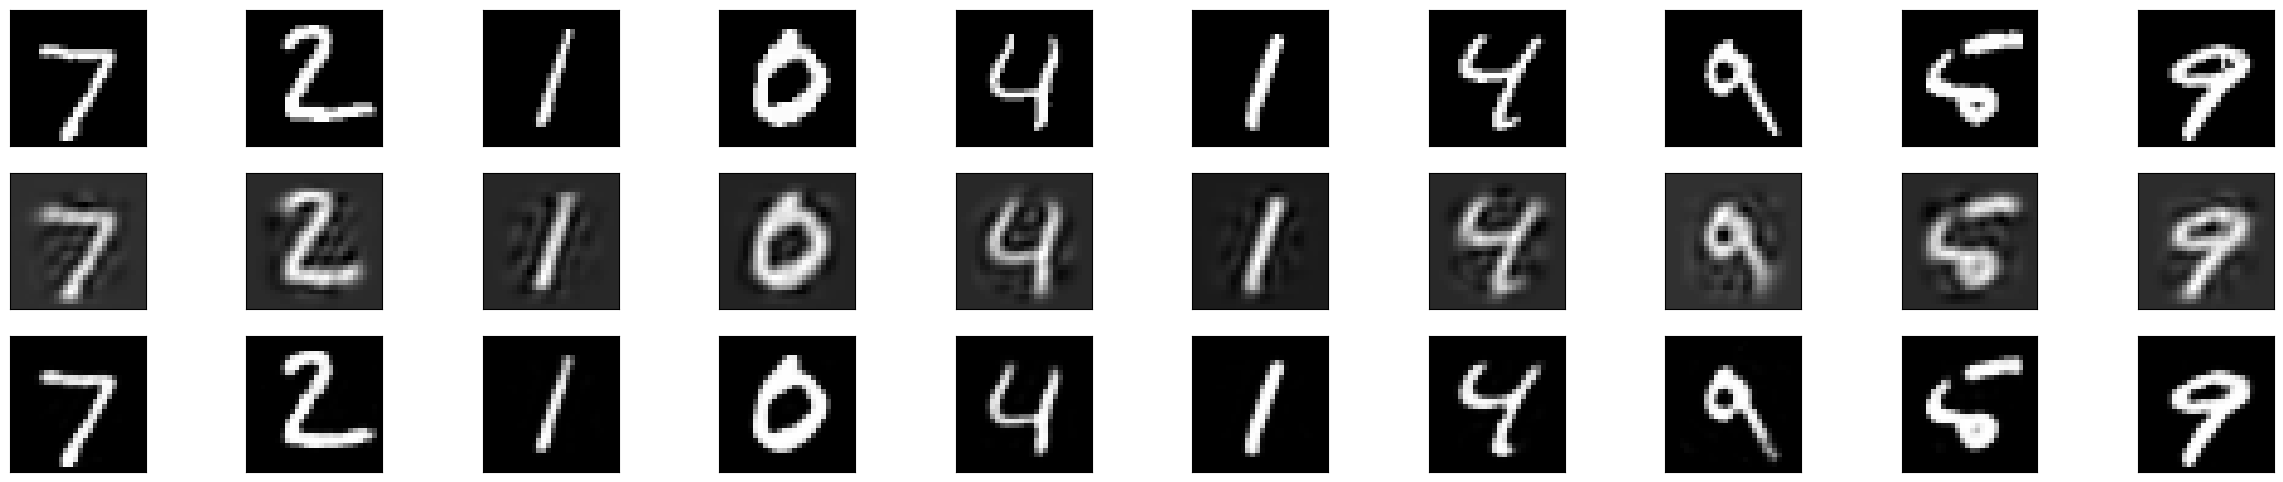

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images for input to the autoencoder and PCA
x_train_flattened = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flattened = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the size of the encoded (compressed) representation
encoding_dim = 64  # This can be changed depending on how much you want to compress the image

# Autoencoder architecture
input_img = Input(shape=(784,))  # 28x28 images flattened into vectors of size 784

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_flattened, x_train_flattened,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flattened, x_test_flattened))

# Define a separate encoder model
encoder = Model(input_img, encoded)

# Encode and decode some images
encoded_imgs = encoder.predict(x_test_flattened)
decoded_imgs = autoencoder.predict(x_test_flattened)

# PCA transformation
pca = PCA(n_components=encoding_dim)
pca_imgs = pca.fit_transform(x_test_flattened)
pca_reconstructed = pca.inverse_transform(pca_imgs)

# Reshape the PCA and decoded images back to 28x28 for visualization
decoded_imgs = decoded_imgs.reshape((len(decoded_imgs), 28, 28))
pca_reconstructed = pca_reconstructed.reshape((len(pca_reconstructed), 28, 28))

# Plot original, PCA-reconstructed, and autoencoder-reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(30, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display PCA-reconstructed images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(pca_reconstructed[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Autoencoder-reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


In [ ]:
# Convolutional Autoencoder for Dimensionality Reduction and Image Processing on CIFAR-10
# Author: Your Name
# Date: 2024-04-27

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, Flatten, Dense, Reshape
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

def load_preprocess_data():
    """
    Load and preprocess the CIFAR-10 dataset.

    Returns:
        x_train (numpy.ndarray): Normalized training images.
        x_test (numpy.ndarray): Normalized testing images.
    """
    (x_train, _), (x_test, _) = cifar10.load_data()
    # Normalize the images to [0, 1] range
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    return x_train, x_test

def build_convolutional_autoencoder(input_shape, encoding_dim):
    """
    Build the convolutional autoencoder model.

    Args:
        input_shape (tuple): Shape of the input images (height, width, channels).
        encoding_dim (int): Dimensionality of the encoded representation.

    Returns:
        autoencoder (Model): Compiled autoencoder model.
        encoder (Model): Encoder part of the autoencoder.
    """
    # Input layer
    input_img = Input(shape=input_shape)

    # Encoder
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 16x16x32
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = MaxPooling2D((2, 2), padding='same')(x)  # 8x8x64
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)  # 4x4x128

    # Flatten and Dense layer for encoding
    shape_before_flattening = encoded.shape[1:]
    x = Flatten()(encoded)
    encoded_dense = Dense(encoding_dim, activation='relu')(x)

    # Decoder
    x = Dense(np.prod(shape_before_flattening), activation='relu')(encoded_dense)
    x = Reshape(shape_before_flattening)(x)
    x = Conv2D(128, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 8x8x128
    x = Conv2D(64, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 16x16x64
    x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)  # 32x32x32
    decoded = Conv2D(input_shape[2], (3, 3), activation='sigmoid', padding='same')(x)  # 32x32x3

    # Autoencoder model
    autoencoder = Model(inputs=input_img, outputs=decoded)

    # Encoder model
    encoder = Model(inputs=input_img, outputs=encoded_dense)

    # Compile the autoencoder
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

    return autoencoder, encoder

def train_autoencoder(autoencoder, x_train, x_test, epochs=100, batch_size=128):
    """
    Train the autoencoder model.

    Args:
        autoencoder (Model): The autoencoder model to train.
        x_train (numpy.ndarray): Training data.
        x_test (numpy.ndarray): Testing data.
        epochs (int): Number of training epochs.
        batch_size (int): Size of the training batches.

    Returns:
        history (History): Training history.
    """
    early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    history = autoencoder.fit(x_train, x_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              shuffle=True,
                              validation_data=(x_test, x_test),
                              callbacks=[early_stop])
    return history

def visualize_results(autoencoder, encoder, x_test, encoding_dim, num_images=10):
    """
    Visualize the original and reconstructed images, and the encoded representations.

    Args:
        autoencoder (Model): Trained autoencoder model.
        encoder (Model): Trained encoder model.
        x_test (numpy.ndarray): Test data.
        encoding_dim (int): Dimensionality of the encoded representations.
        num_images (int): Number of images to display.
    """
    # Select random test images
    np.random.seed(42)
    indices = np.random.randint(0, x_test.shape[0], num_images)
    selected_images = x_test[indices]

    # Reconstruct the images
    reconstructed = autoencoder.predict(selected_images)

    # Encode the images
    encoded_imgs = encoder.predict(selected_images)

    # Plot original and reconstructed images
    plt.figure(figsize=(20, 6))
    for i in range(num_images):
        # Original
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(selected_images[i])
        plt.title("Original")
        plt.axis('off')

        # Reconstructed
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i])
        plt.title("Reconstructed")
        plt.axis('off')

        # Encoded (for high-dimensional data, display as a bar chart)
        ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
        plt.bar(range(encoding_dim), encoded_imgs[i])
        plt.title("Encoded")
        plt.xlabel("Dim")
        plt.ylabel("Value")
        plt.tight_layout()
    plt.show()

    # If encoding_dim is 2, plot the encoded representations
    if encoding_dim == 2:
        plt.figure(figsize=(8, 6))
        plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
        plt.title("2D Encoded Representations")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.show()

def main():
    # Parameters
    encoding_dim = 64  # Change to 2 for 2D visualization
    epochs = 100
    batch_size = 128

    # Load and preprocess data
    x_train, x_test = load_preprocess_data()
    input_shape = x_train.shape[1:]  # (32, 32, 3)

    # Build the convolutional autoencoder
    autoencoder, encoder = build_convolutional_autoencoder(input_shape, encoding_dim)
    autoencoder.summary()

    # Train the autoencoder
    history = train_autoencoder(autoencoder, x_train, x_test, epochs, batch_size)

    # Plot training history
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training History")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Visualize the results
    visualize_results(autoencoder, encoder, x_test, encoding_dim, num_images=10)

    # Dimensionality Reduction Example
    if encoding_dim == 2:
        encoded_imgs = encoder.predict(x_test)
        plt.figure(figsize=(8, 6))
        plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
        plt.title("2D Encoded Representations")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.show()

if __name__ == "__main__":
    main()


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 1201s 7us/step


Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)           │ (None, 32, 32, 3)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │         131,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 2048)                │         133,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 4, 4, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d (UpSampling2D)         │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 8, 8, 64)            │          73,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_1 (UpSampling2D)       │ (None, 16, 16, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 16, 16, 32)          │          18,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ up_sampling2d_2 (UpSampling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 32, 32, 3)           │             867 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 598,211 (2.28 MB)

 Trainable params: 598,211 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 142s 332ms/step - loss: 0.6285 - val_loss: 0.5887
Epoch 2/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 150s 383ms/step - loss: 0.5865 - val_loss: 0.5835
Epoch 3/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 144s 368ms/step - loss: 0.5824 - val_loss: 0.5810
Epoch 4/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 128s 328ms/step - loss: 0.5797 - val_loss: 0.5795
Epoch 5/100
391/391 ━━━━━━━━━━━━━━━━━━━━ 149s 381ms/step - loss: 0.5777 - val_loss: 0.5779
Epoch 6/100
130/391 ━━━━━━━━━━━━━━━━━━━━ 1:38 377ms/step - loss: 0.5772

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 784)                 │         101,136 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 222,384 (868.69 KB)

 Trainable params: 222,384 (868.69 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 0.3425 - val_loss: 0.1682
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1578 - val_loss: 0.1355
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1337 - val_loss: 0.1248
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1245 - val_loss: 0.1175
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1181 - val_loss: 0.1126
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1132 - val_loss: 0.1089
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1100 - val_loss: 0.1069
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1075 - val_loss: 0.1049
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 0.1056 - val_loss: 0.1034
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1036 - val_loss: 0.1014
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1019 - val_loss: 0.1003
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 

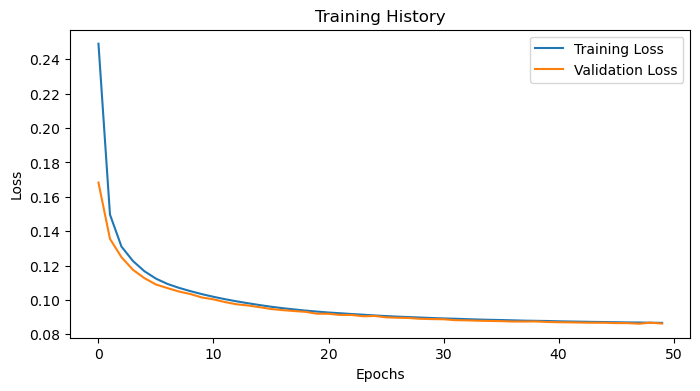

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step


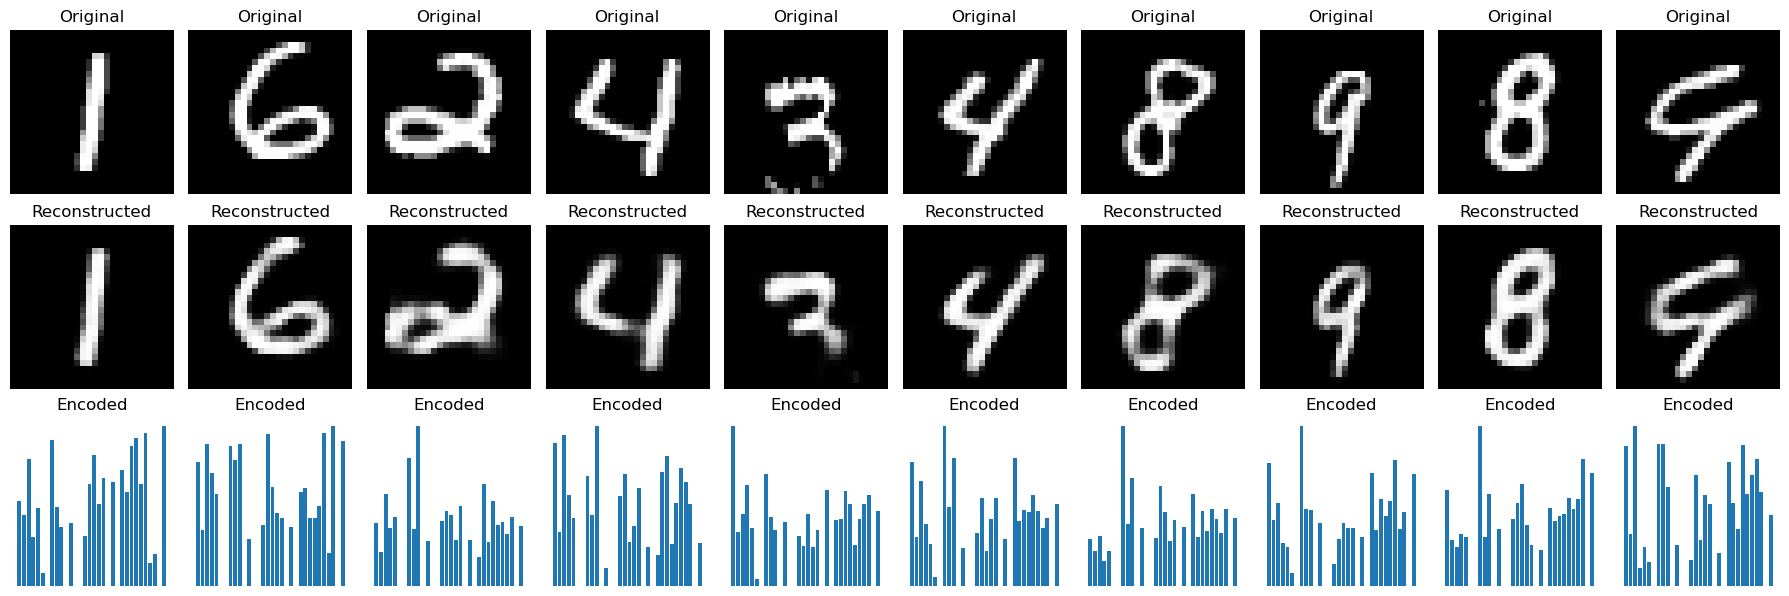

In [ ]:
# Autoencoder for Dimensionality Reduction and Image Processing
# Author: Your Name
# Date: 2024-04-27

import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.optimizers import Adam

def load_preprocess_data():
    """
    Load and preprocess the MNIST dataset.

    Returns:
        x_train (numpy.ndarray): Normalized training images.
        x_test (numpy.ndarray): Normalized testing images.
    """
    (x_train, _), (x_test, _) = mnist.load_data()
    # Normalize the images to [0, 1] range
    x_train = x_train.astype('float32') / 255.
    x_test = x_test.astype('float32') / 255.
    # Flatten the images for the autoencoder
    x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
    x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
    return x_train, x_test

def build_autoencoder(input_dim, encoding_dim):
    """
    Build the autoencoder model.

    Args:
        input_dim (int): Dimensionality of the input data.
        encoding_dim (int): Dimensionality of the encoded representation.

    Returns:
        autoencoder (Model): Compiled autoencoder model.
        encoder (Model): Encoder part of the autoencoder.
    """
    # Input layer
    input_img = Input(shape=(input_dim,))

    # Encoder layers
    encoded = Dense(128, activation='relu')(input_img)
    encoded = Dense(64, activation='relu')(encoded)
    encoded = Dense(encoding_dim, activation='relu')(encoded)

    # Decoder layers
    decoded = Dense(64, activation='relu')(encoded)
    decoded = Dense(128, activation='relu')(decoded)
    decoded = Dense(input_dim, activation='sigmoid')(decoded)

    # Autoencoder model
    autoencoder = Model(inputs=input_img, outputs=decoded)

    # Encoder model
    encoder = Model(inputs=input_img, outputs=encoded)

    # Compile the autoencoder
    autoencoder.compile(optimizer=Adam(), loss='binary_crossentropy')

    return autoencoder, encoder

def train_autoencoder(autoencoder, x_train, x_test, epochs=50, batch_size=256):
    """
    Train the autoencoder model.

    Args:
        autoencoder (Model): The autoencoder model to train.
        x_train (numpy.ndarray): Training data.
        x_test (numpy.ndarray): Testing data.
        epochs (int): Number of training epochs.
        batch_size (int): Size of the training batches.

    Returns:
        history (History): Training history.
    """
    history = autoencoder.fit(x_train, x_train,
                              epochs=epochs,
                              batch_size=batch_size,
                              shuffle=True,
                              validation_data=(x_test, x_test))
    return history

def visualize_results(autoencoder, encoder, x_test, encoding_dim, num_images=10):
    """
    Visualize the original and reconstructed images, and the encoded representations.

    Args:
        autoencoder (Model): Trained autoencoder model.
        encoder (Model): Trained encoder model.
        x_test (numpy.ndarray): Test data.
        encoding_dim (int): Dimensionality of the encoded representations.
        num_images (int): Number of images to display.
    """
    # Select random test images
    np.random.seed(42)
    indices = np.random.randint(0, x_test.shape[0], num_images)
    selected_images = x_test[indices]

    # Reconstruct the images
    reconstructed = autoencoder.predict(selected_images)

    # Encode the images
    encoded_imgs = encoder.predict(selected_images)

    # Plot original and reconstructed images
    plt.figure(figsize=(18, 6))
    for i in range(num_images):
        # Original
        ax = plt.subplot(3, num_images, i + 1)
        plt.imshow(selected_images[i].reshape(28, 28), cmap='gray')
        plt.title("Original")
        plt.axis('off')

        # Reconstructed
        ax = plt.subplot(3, num_images, i + 1 + num_images)
        plt.imshow(reconstructed[i].reshape(28, 28), cmap='gray')
        plt.title("Reconstructed")
        plt.axis('off')

        # Encoded (for high-dimensional data, we can plot projections if encoding_dim > 2)
        if encoding_dim == 2:
            ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
            plt.scatter(encoded_imgs[i, 0], encoded_imgs[i, 1], c='red')
            plt.title(f"Encoded: [{encoded_imgs[i,0]:.2f}, {encoded_imgs[i,1]:.2f}]")
            plt.axis('off')
        else:
            # For higher dimensions, display as a bar chart
            ax = plt.subplot(3, num_images, i + 1 + 2 * num_images)
            plt.bar(range(encoding_dim), encoded_imgs[i])
            plt.title("Encoded")
            plt.axis('off')
    plt.tight_layout()
    plt.show()

def main():
    # Parameters
    encoding_dim = 32  # Change to 2 for 2D visualization
    epochs = 50
    batch_size = 256

    # Load and preprocess data
    x_train, x_test = load_preprocess_data()
    input_dim = x_train.shape[1]

    # Build the autoencoder
    autoencoder, encoder = build_autoencoder(input_dim, encoding_dim)
    autoencoder.summary()

    # Train the autoencoder
    history = train_autoencoder(autoencoder, x_train, x_test, epochs, batch_size)

    # Plot training history
    plt.figure(figsize=(8, 4))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title("Training History")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()

    # Visualize the results
    visualize_results(autoencoder, encoder, x_test, encoding_dim, num_images=10)

    # Dimensionality Reduction Example
    if encoding_dim == 2:
        encoded_imgs = encoder.predict(x_test)
        plt.figure(figsize=(8, 6))
        plt.scatter(encoded_imgs[:, 0], encoded_imgs[:, 1], c='blue', alpha=0.5)
        plt.title("2D Encoded Representations")
        plt.xlabel("Dimension 1")
        plt.ylabel("Dimension 2")
        plt.show()

if __name__ == "__main__":
    main()


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.3497 - val_loss: 0.1650
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.1539 - val_loss: 0.1263
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 0.1227 - val_loss: 0.1085
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.1068 - val_loss: 0.0979
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0969 - val_loss: 0.0906
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0900 - val_loss: 0.0854
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0853 - val_loss: 0.0817
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0817 - val_loss: 0.0792
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0795 - val_loss: 0.0775
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0778 - val_loss: 0.0763
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0768 - val_loss: 0.0755
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms

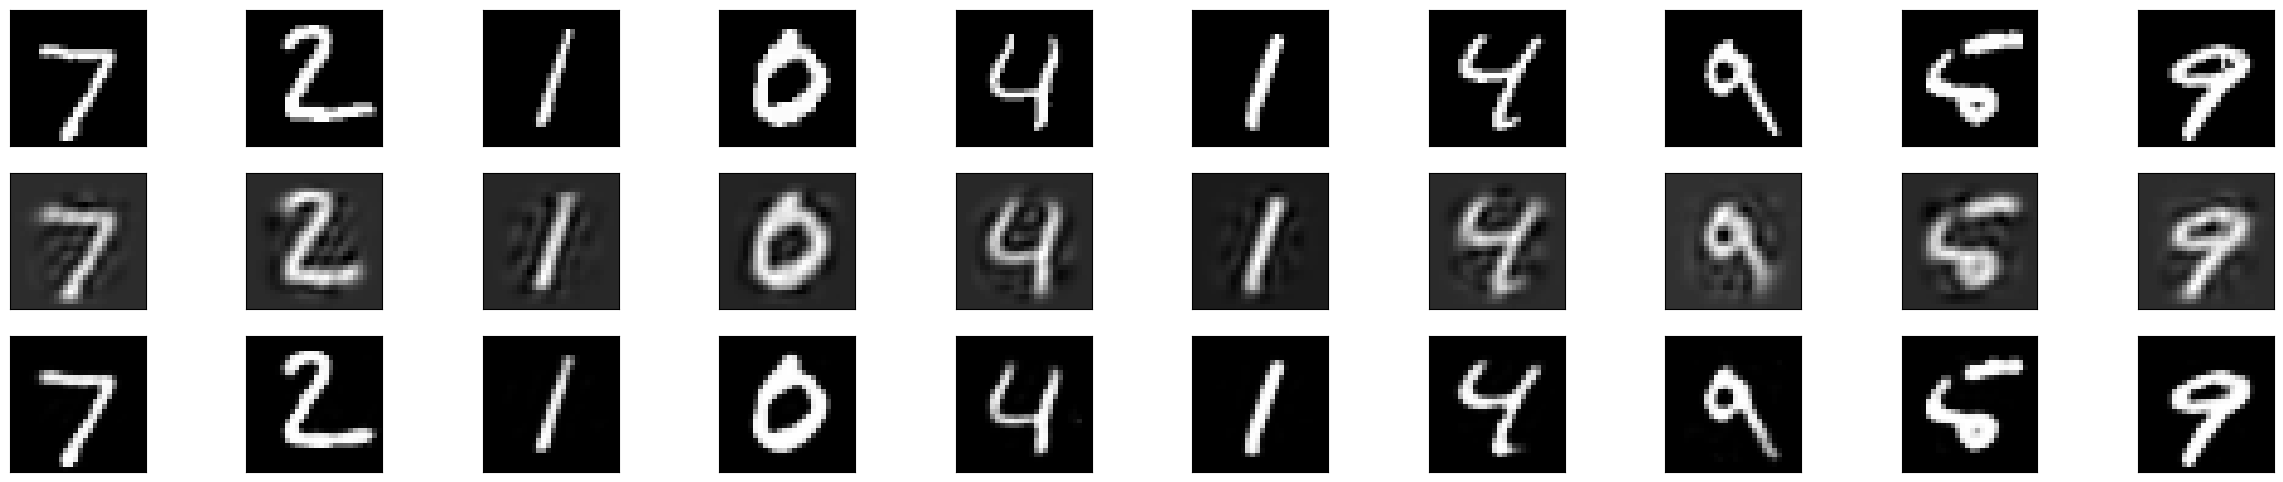

In [ ]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist

# Load the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()

# Normalize the data
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

# Flatten the images for input to the autoencoder and PCA
x_train_flattened = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test_flattened = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the size of the encoded (compressed) representation
encoding_dim = 64  # This can be changed depending on how much you want to compress the image

# Autoencoder architecture
input_img = Input(shape=(784,))  # 28x28 images flattened into vectors of size 784

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_img)

# Decoder
decoded = Dense(784, activation='sigmoid')(encoded)

# Combine encoder and decoder into an autoencoder model
autoencoder = Model(input_img, decoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train_flattened, x_train_flattened,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_flattened, x_test_flattened))

# Define a separate encoder model
encoder = Model(input_img, encoded)

# Encode and decode some images
encoded_imgs = encoder.predict(x_test_flattened)
decoded_imgs = autoencoder.predict(x_test_flattened)

# PCA transformation
pca = PCA(n_components=encoding_dim)
pca_imgs = pca.fit_transform(x_test_flattened)
pca_reconstructed = pca.inverse_transform(pca_imgs)

# Reshape the PCA and decoded images back to 28x28 for visualization
decoded_imgs = decoded_imgs.reshape((len(decoded_imgs), 28, 28))
pca_reconstructed = pca_reconstructed.reshape((len(pca_reconstructed), 28, 28))

# Plot original, PCA-reconstructed, and autoencoder-reconstructed images
n = 10  # number of images to display
plt.figure(figsize=(30, 6))
for i in range(n):
    # Display original images
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display PCA-reconstructed images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(pca_reconstructed[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display Autoencoder-reconstructed images
    ax = plt.subplot(3, n, i + 1 + 2 * n)
    plt.imshow(decoded_imgs[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()
